In [1]:
# TP 2 - Espérance conditionnelle (reprendre le TP1 au début)

import numpy as np

n = 100 # nombre d'étapes
T = 1.0 # temps final
deltat = T/n # pas de temps
S0 = 80 # prix initial
sigma = 0.1 # volatilité
up = np.exp(sigma*np.sqrt(deltat)) # up
down = 1/up # down

# taux d'intérêt et facteur d'actualisation
r = 0.1
R = np.exp(r*deltat)

# probabilité risque neutre
p = (R-down)/(up-down)

print("p =",p)

p = 0.547524195428134


In [2]:
# matrice des prix de l'actif
def CRR(n,down,up,S0):
    S = np.zeros((n+1,n+1))
    S[0,0] = S0
    for i in range(n):
        S[i+1,0] = S[i,0]*down
        for j in range(i+1):
            S[i+1,j+1] = S[i,j]*up
    return S


In [3]:
S = CRR(n,down,up,S0)
S

array([[ 80.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 79.2039867 ,  80.80401337,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 78.41589386,  80.        ,  81.6161072 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [ 30.02488791,  30.63143088,  31.25022683, ..., 213.15649935,
          0.        ,   0.        ],
       [ 29.72613528,  30.32664305,  30.93928188, ..., 211.03555675,
        215.29875779,   0.        ],
       [ 29.43035529,  30.02488791,  30.63143088, ..., 208.93571787,
        213.15649935, 217.46254628]])

In [4]:
# paramètres de l'option
K = S0 # strike (ici, option à la "monnaie")

def payoff(S,K):
    phi = max(S-K,0) # option d'achat
    #phi = max(K-S,0) # option de vente
    return phi


In [5]:
# évaluation du prix de l'option par récurrence rétrograde
C = np.zeros((n+1,n+1))
for j in range(n+1):
    C[n,j] = payoff(S[n,j],K)
for i in range(n-1,-1,-1):
    for j in range(i+1):
        C[i,j] = (p*C[i+1,j+1]+(1-p)*C[i+1,j])/R


In [6]:
print("La prime du contrat vaut C0 =",C[0,0])

La prime du contrat vaut C0 = 8.237337130956632


In [7]:
from scipy.stats import binom

# calcul des valeurs de l'option par formule binomiale directe
CC = np.zeros((n+1,n+1))
for j in range(n+1):
    CC[n,j] = payoff(S[n,j],K)
for i in range(n+1):
    for j in range(i+1):
        for k in range(n-i+1):
            CC[i,j] += payoff(S[n,j+k],K)*binom.pmf(k,n-i,p)
        CC[i,j] = CC[i,j]/R**(n-i)


In [8]:
print("La prime du contrat vaut C0=",CC[0,0])
print("Erreur entre les 2 calculs =",np.amax(C-CC))

La prime du contrat vaut C0= 8.237337130956375
Erreur entre les 2 calculs = 2.3021584638627246e-12


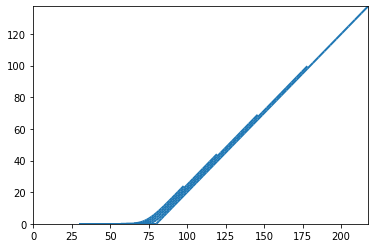

In [9]:
# librairies graphiques
import matplotlib.pyplot as plt
import matplotlib.collections as mc

# liste des couples de points
lines = []
for i in range(0,n+1,20):
    for j in range(i):
        lines.append([(S[i,j],C[i,j]),(S[i,j+1],C[i,j+1])])

# plot
lc = mc.LineCollection(lines, cmap=plt.cm.rainbow, linewidths=2)
fig,ax = plt.subplots()
ax.set_xlim(0,S.max())
ax.set_ylim(0,C.max())
ax.add_collection(lc)
plt.show()


In [10]:
# Variations de la prime en fonction du strike
deltaK = int(S0/10) # on fait varier le strike K entre 0 et 160
CCK = np.zeros(20)
for l in range(20):
    Ktmp = l*deltaK # strike temporaire
    # formule binomiale directe (cf matrice CC) pour i = 0 et j = 0
    for k in range(n+1):
        CCK[l] += payoff(S[n,k],Ktmp)*binom.pmf(k,n,p)
    CCK[l] = CCK[l]/R**n
    

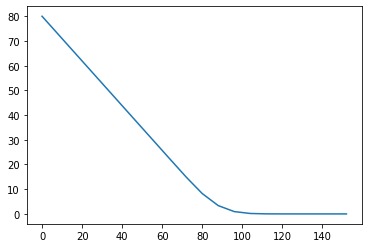

In [11]:
plt.plot(range(0,20*deltaK,deltaK),CCK)
plt.show()

In [12]:
# Variations de la prime en fonction de la volatilité
deltasigma = 0.02 # on fait varier sigma entre 0.02 et 0.4
CCsigma = np.zeros(20)
sigmatab = np.zeros(20)
for l in range(20):
    sigmatab[l] = (l+1)*deltasigma # volatilité temporaire
    uptmp = np.exp((l+1)*deltasigma*np.sqrt(deltat)) # on recalcule le up
    downtmp = 1/uptmp # et le down
    Stmp = CRR(n,downtmp,uptmp,S0) # et l'arbre des prix de l'actif
    ptmp = (R-downtmp)/(uptmp-downtmp) # et la probabilité p
    for k in range(n+1):
        CCsigma[l] += payoff(Stmp[n,k],K)*binom.pmf(k,n,ptmp)
    CCsigma[l] = CCsigma[l]/R**n


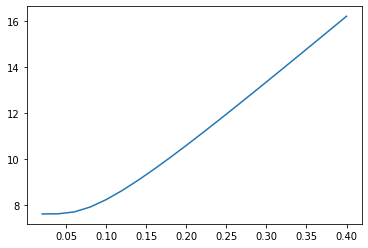

In [13]:
plt.plot(sigmatab,CCsigma)
plt.show()